# Popular Data Science Questions

Using [Data Science Stack Exchange](https://datascience.stackexchange.com/), the goal of this project is to determine the best content to create for a data science company based on interest by subject.

# Stack Exchange

## What kind of questions are welcome on this site?
On DSSE's help center's section on [questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that there are other two sites that are relevant:
* [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
* [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

## What, other than questions, does the site's home subdivide into?

On the [home page](https://datascience.stackexchange.com) we can see that we have four sections:
* [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
* [Tags](https://datascience.stackexchange.com/tags) — keywords or labels that categorize questions;
* [Users](https://datascience.stackexchange.com/users) — a list of users;
* [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

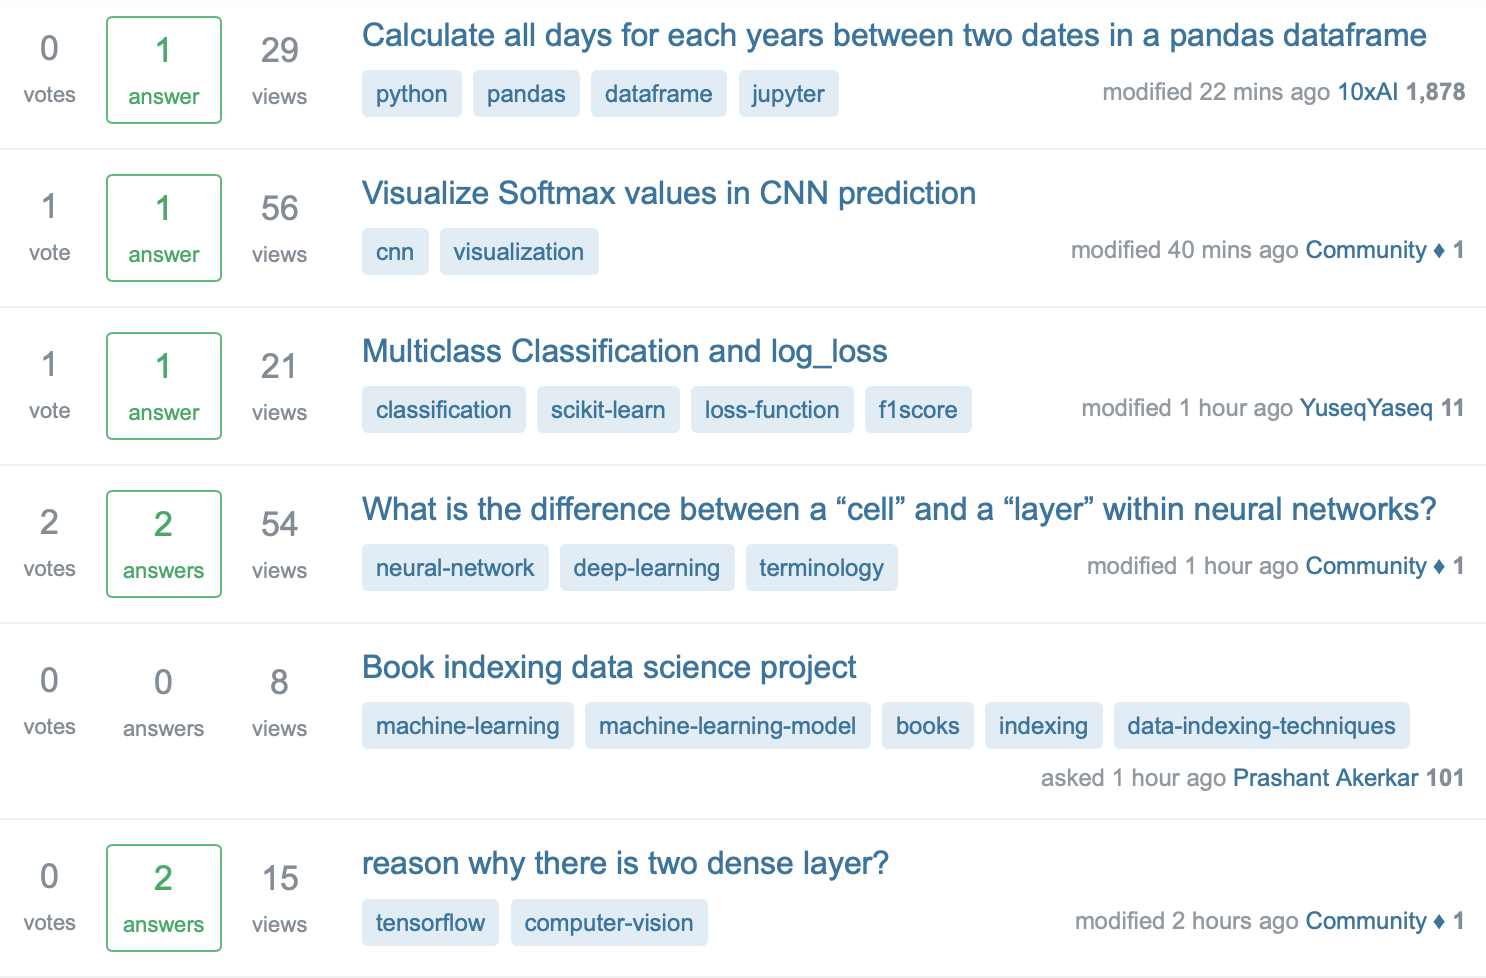

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.
Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

## What information is available in each post?

Looking, just as an example, at this [question](https://datascience.stackexchange.com/questions/53858/formal-proof-of-vanilla-policy-gradient-convergence), some of the information we see is:

* The posts's score;
* The posts's title;
* The posts's author;
* The posts's body;
* The last time the question as active;
* How many times the question was viewed;
* Related questions;
* The question's tags;

## Stack Exchange Data Explorer

Stack Exchange provides a public data base for each of its websites. This [link](https://data.stackexchange.com/datascience/query/new) is used to query and explore Data Science Stack Exchange's database.

More about Stack Exchange Data Explorer (SEDE) on its [help section](https://data.stackexchange.com/help) and on this [tutorial link](https://data.stackexchange.com/tutorial).

In the image below we can see the names of each of the tables in the database. Clicking on the names will expand to show the columns of each table.

![image](https://dq-content.s3.amazonaws.com/469/dsde.png) 

Exploreing the Data Science Stack Exchange's data model and investigating the tables, the below have been identified as promising towards finding the most popular content:

* Post
* PostTags
* Tags
* Vote

We will be focusing on the `Post` as it contains the relevant information we need for example, the **ViewCount**, **Score** and so on.

## Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

* `Id`: An identification number for the post.
* `PostTypeId`: An identification number for the type of post.

![image](https://dq-content.s3.amazonaws.com/469/PostTypes.png)

* `CreationDate`: The date and time of creation of the post.
* `Score`: The post's score.
* `ViewCount`: How many times the post was viewed.
* `Tags`: What tags were used.
* `AnswerCount`: How many answers the question got (only applicable to question posts).
* `FavoriteCount`: How many times the question was favored (only applicable to question posts).

Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

There are eight different types of post. Before we try to figure out which of them are relevant to us, let's check how many of them there are:

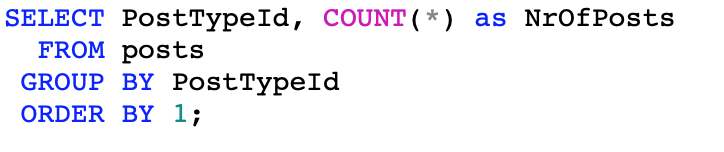


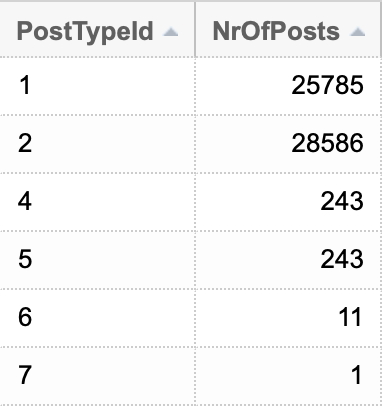

We'll limit our analysis to the posts of 2019 and focus on the posts that are questions.

Running a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019.



Here are the first few rows. We can see that favourite count has some missing values.


The result of the query was stored in a file called `2019_questions.csv`. 

# Exploring the Data

In [1]:
import pandas as pd
original_questions = pd.read_csv('2019_questions.csv')
questions = original_questions.copy()
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7540 entries, 0 to 7539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7540 non-null   int64  
 1   PostTypeId     7540 non-null   int64  
 2   CreationDate   7540 non-null   object 
 3   Score          7540 non-null   int64  
 4   ViewCount      7540 non-null   int64  
 5   Tags           7540 non-null   object 
 6   AnswerCount    7540 non-null   int64  
 7   FavoriteCount  1525 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 471.4+ KB


In [2]:
questions.head()

Id  PostTypeId         CreationDate  Score  ViewCount  \
0  61536           1  2019-10-10 05:58:58      1        131   
1  61540           1  2019-10-10 06:51:08      0         26   
2  61544           1  2019-10-10 08:28:22      0         26   
3  61546           1  2019-10-10 09:06:55      0        268   
4  61547           1  2019-10-10 09:37:34      0         15   

                                                Tags  AnswerCount  \
0  <machine-learning><neural-network><reinforceme...            1   
1                     <machine-learning><classifier>            1   
2                                      <dataset><ml>            1   
3  <machine-learning><python><deep-learning><kera...            1   
4                                         <r><image>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [3]:
questions.isnull().sum()

Id                  0
PostTypeId          0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    6015
dtype: int64

`FavoriteCount` has 6015 missing values. This probably means that this was not present in the user's favourite list and so we can replace it with **0**

In [4]:
questions['FavoriteCount'] = 0
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

All data in the `Tags` are strings.

# Cleaning the Data

Let's change the type of the `CreationDate` to `datetime[ns]` and clean up the `Tags` column.

In [5]:
import datetime
questions['CreationDate'] = questions['CreationDate'].astype(('datetime64[ns]'))

In [6]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7540 entries, 0 to 7539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7540 non-null   int64         
 1   PostTypeId     7540 non-null   int64         
 2   CreationDate   7540 non-null   datetime64[ns]
 3   Score          7540 non-null   int64         
 4   ViewCount      7540 non-null   int64         
 5   Tags           7540 non-null   object        
 6   AnswerCount    7540 non-null   int64         
 7   FavoriteCount  7540 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 471.4+ KB


In [7]:
questions['Tags'].head()

0    <machine-learning><neural-network><reinforceme...
1                       <machine-learning><classifier>
2                                        <dataset><ml>
3    <machine-learning><python><deep-learning><kera...
4                                           <r><image>
Name: Tags, dtype: object

In [8]:
#using a regex expression
questions['Tags'] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [9]:
questions['Tags'].head(5)

0    [machine-learning, neural-network, reinforceme...
1                       [machine-learning, classifier]
2                                        [dataset, ml]
3    [machine-learning, python, deep-learning, kera...
4                                           [r, image]
Name: Tags, dtype: object

## Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [10]:
questions['Tags'].sample(10)

7186                         [classification, perceptron]
3422                       [python, software-development]
4315                                         [keras, mlp]
4230                                [neural-network, cnn]
913                            [python, jupyter, ipython]
7298    [machine-learning, gaussian, discriminant-anal...
1696           [scikit-learn, feature-selection, xgboost]
6967     [python, classification, svm, tfidf, classifier]
6707            [python, neural-network, keras, accuracy]
1322    [machine-learning, categorical-data, beginner,...
Name: Tags, dtype: object

Let's count how many times the tag was used...

In [11]:
used_tags = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in used_tags:
            used_tags[tag] += 1
        else:
            used_tags[tag] = 1

In [12]:
used_tags

{'machine-learning': 2332,
 'neural-network': 913,
 'reinforcement-learning': 170,
 'dqn': 30,
 'classifier': 17,
 'dataset': 284,
 'ml': 6,
 'python': 1580,
 'deep-learning': 1003,
 'keras': 796,
 'convnet': 93,
 'r': 227,
 'image': 27,
 'scikit-learn': 482,
 'pandas': 333,
 'linear-regression': 154,
 'classification': 612,
 'class-imbalance': 68,
 'imbalanced-learn': 20,
 'tensorflow': 480,
 'data-science-model': 163,
 'nlp': 434,
 'named-entity-recognition': 32,
 'spacy': 20,
 'predictive-modeling': 230,
 'lstm': 313,
 'embeddings': 42,
 'data-mining': 187,
 'correlation': 74,
 'association-rules': 12,
 'pattern-recognition': 2,
 'dataframe': 75,
 'pca': 78,
 'descriptive-statistics': 18,
 'normalization': 67,
 'ensemble-modeling': 26,
 'activation-function': 38,
 'gan': 69,
 'generative-models': 36,
 'mnist': 21,
 'sampling': 29,
 'time-series': 367,
 'regression': 303,
 'probability': 56,
 'bayesian': 30,
 'dirichlet': 4,
 'object-detection': 78,
 'object-recognition': 12,
 'stati

Transforming the `used_tags` into a dataframe

In [13]:
#orient{‘columns’, ‘index’}, default ‘columns’
used_tags_df = pd.DataFrame.from_dict(used_tags, orient = 'index')
used_tags_df

0
machine-learning        2332
neural-network           913
reinforcement-learning   170
dqn                       30
classifier                17
...                      ...
domain-adaptation          1
theano                     2
shap                       1
hog                        1
esl                        1

[501 rows x 1 columns]

In [14]:
used_tags_df = used_tags_df.rename({0:'count'}, axis = 1)
used_tags_df

count
machine-learning         2332
neural-network            913
reinforcement-learning    170
dqn                        30
classifier                 17
...                       ...
domain-adaptation           1
theano                      2
shap                        1
hog                         1
esl                         1

[501 rows x 1 columns]

Sorting the `used_tags_df` to get the top 20

In [15]:
most_used = used_tags_df.sort_values('count').tail(20)
most_used

count
machine-learning-model    195
statistics                199
r                         227
predictive-modeling       230
clustering                243
dataset                   284
regression                303
lstm                      313
pandas                    333
time-series               367
cnn                       411
nlp                       434
tensorflow                480
scikit-learn              482
classification            612
keras                     796
neural-network            913
deep-learning            1003
python                   1580
machine-learning         2332

Visualising the above data:

<AxesSubplot:>

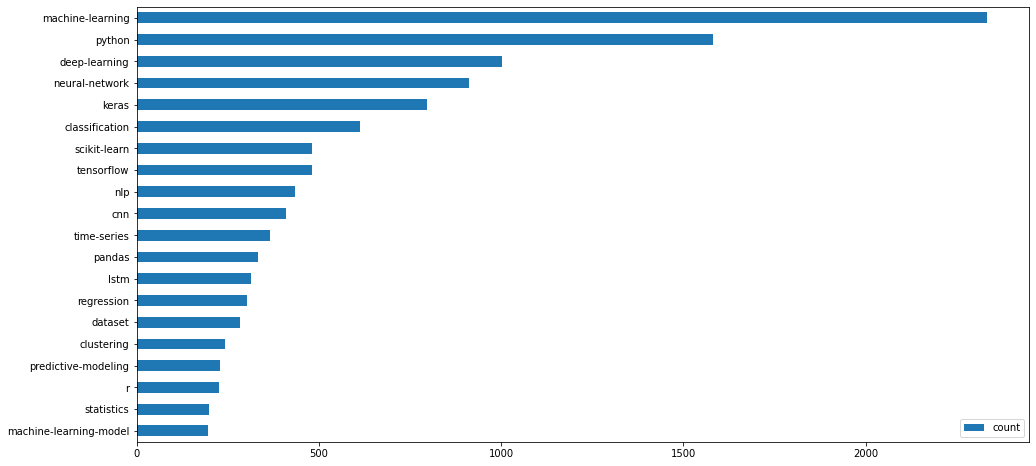

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
most_used.plot(kind = 'barh', figsize = (16,8))

In [17]:
questions

Id  PostTypeId        CreationDate  Score  ViewCount  \
0     61536           1 2019-10-10 05:58:58      1        131   
1     61540           1 2019-10-10 06:51:08      0         26   
2     61544           1 2019-10-10 08:28:22      0         26   
3     61546           1 2019-10-10 09:06:55      0        268   
4     61547           1 2019-10-10 09:37:34      0         15   
...     ...         ...                 ...    ...        ...   
7535  52947           1 2019-05-31 00:01:55      2         69   
7536  52948           1 2019-05-31 00:06:04      1         41   
7537  52949           1 2019-05-31 00:50:57      1         22   
7538  52952           1 2019-05-31 03:13:43      1         38   
7539  52953           1 2019-05-31 04:49:37      1         46   

                                                   Tags  AnswerCount  \
0     [machine-learning, neural-network, reinforceme...            1   
1                        [machine-learning, classifier]            1   
2                                         [dataset, ml]            1   
3     [machine-learning, python, deep-learning, kera...            1   
4                                            [r, image]            0   
...                                                 ...          ...   
7535       [text-mining, orange, information-retrieval]            0   
7536  [python, neural-network, cross-validation, dro...            0   
7537     [prediction, multilabel-classification, score]            0   
7538  [multiclass-classification, class-imbalance, s...            0   
7539  [logistic-regression, dimensionality-reduction...            0   

      FavoriteCount  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
7535              0  
7536              0  
7537              0  
7538              0  
7539              0  

[7540 rows x 8 columns]

Next, count how many times each tag was viewed using `pandas.DataFrame.iterrows` to iterate over DataFrame rows as (index, Series) pairs.

In [18]:
viewed_tags = {}

for key, value in questions.iterrows():
    for tag in value['Tags']:
        if tag in viewed_tags:
            viewed_tags[tag] += value['ViewCount']
        else:
            viewed_tags[tag] = value['ViewCount']
viewed_tags

{'machine-learning': 884100,
 'neural-network': 431746,
 'reinforcement-learning': 38666,
 'dqn': 8411,
 'classifier': 11001,
 'dataset': 94029,
 'ml': 2572,
 'python': 1373220,
 'deep-learning': 513770,
 'keras': 614273,
 'convnet': 34546,
 'r': 78015,
 'image': 13016,
 'scikit-learn': 321732,
 'pandas': 617408,
 'linear-regression': 45824,
 'classification': 241766,
 'class-imbalance': 41253,
 'imbalanced-learn': 8258,
 'tensorflow': 296186,
 'data-science-model': 53446,
 'nlp': 176212,
 'named-entity-recognition': 8676,
 'spacy': 10238,
 'predictive-modeling': 32012,
 'lstm': 162117,
 'embeddings': 9494,
 'data-mining': 84451,
 'correlation': 28452,
 'association-rules': 894,
 'pattern-recognition': 86,
 'dataframe': 238046,
 'pca': 14813,
 'descriptive-statistics': 3040,
 'normalization': 39452,
 'ensemble-modeling': 2840,
 'activation-function': 32135,
 'gan': 30913,
 'generative-models': 7609,
 'mnist': 7767,
 'sampling': 10573,
 'time-series': 148104,
 'regression': 106824,
 'pr

In [19]:
viewed_tags_df = pd.DataFrame.from_dict(viewed_tags, orient = 'index')

In [20]:
viewed_tags_df = viewed_tags_df.rename({0:'views'}, axis = 1)
viewed_tags_df.head()

views
machine-learning        884100
neural-network          431746
reinforcement-learning   38666
dqn                       8411
classifier               11001

Sorting the `viewed_tags_df` to get the top 20

In [21]:
most_viewed = viewed_tags_df.sort_values('views').tail(20)
most_viewed

views
seaborn             85224
dataset             94029
pytorch            100230
csv                102750
regression         106824
numpy              131470
time-series        148104
lstm               162117
cnn                173831
nlp                176212
dataframe          238046
classification     241766
tensorflow         296186
scikit-learn       321732
neural-network     431746
deep-learning      513770
keras              614273
pandas             617408
machine-learning   884100
python            1373220

Visualising the above

<AxesSubplot:>

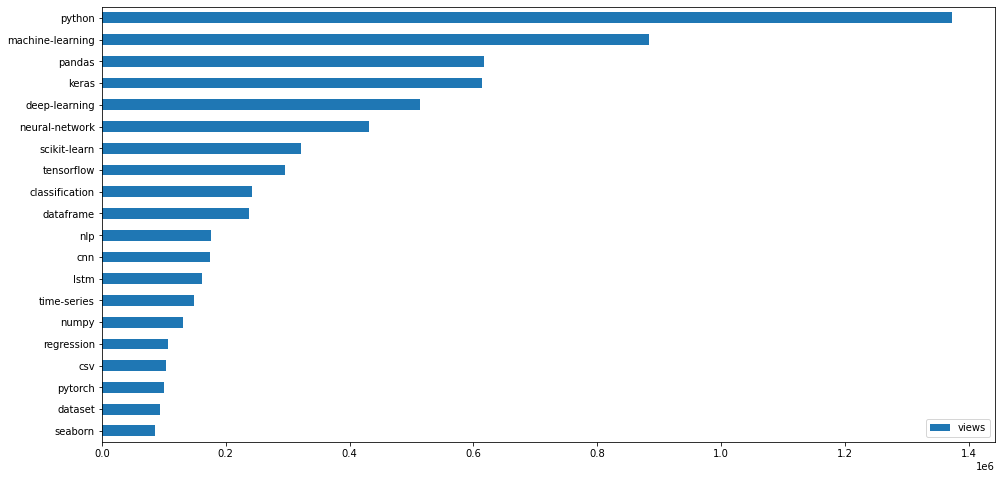

In [22]:
most_viewed.plot(kind = 'barh', figsize = (16,8))

Ploting `most_used` and `most_viewed` side by side

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

array([<AxesSubplot:title={'center':'views'}>], dtype=object)

## Relationship Between Tags

`most_used` is a dataframe that counts how many times each of the top 20 tags was used.
`most_viewed` is a dataframe that counts how many times each of the top 20 tags was viewed.

Looking at the results, we see that most top tags are present in both dataframes.

Let's see what tags are in `most_used`, but not in `most_viewed`. We can identify them by the missing values in ViewCount below.

In [24]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

count      views
machine-learning-model    195        NaN
statistics                199        NaN
r                         227        NaN
predictive-modeling       230        NaN
clustering                243        NaN
dataset                   284    94029.0
regression                303   106824.0
lstm                      313   162117.0
pandas                    333   617408.0
time-series               367   148104.0
cnn                       411   173831.0
nlp                       434   176212.0
tensorflow                480   296186.0
scikit-learn              482   321732.0
classification            612   241766.0
keras                     796   614273.0
neural-network            913   431746.0
deep-learning            1003   513770.0
python                   1580  1373220.0
machine-learning         2332   884100.0

Similarly, let's see what tags are in the latter, but not the former:

In [25]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

count    views
seaborn              NaN    85224
dataset            284.0    94029
pytorch              NaN   100230
csv                  NaN   102750
regression         303.0   106824
numpy                NaN   131470
time-series        367.0   148104
lstm               313.0   162117
cnn                411.0   173831
nlp                434.0   176212
dataframe            NaN   238046
classification     612.0   241766
tensorflow         480.0   296186
scikit-learn       482.0   321732
neural-network     913.0   431746
deep-learning     1003.0   513770
keras              796.0   614273
pandas             333.0   617408
machine-learning  2332.0   884100
python            1580.0  1373220

The tags present in `most_used` and not present in `most_viewed` are:

* `machine-learning-model`
* `statistics`
* `predictive-modeling`
* `r`
* `clustering`

And the tags present in `most_viewed` but not in `most_used` are:

* `csv`
* `pytorch`
* `dataframe`
* `seaborn`
* `numpy`

Some tags also stand out as being related. For example, `python` is related to `pandas`because pandas is a Python library. Other pairs of tags, shouldn't be related at all, like `pandas` and `r`

**How are these tags related?** 

Let's count how many times these tags appear

In [26]:
#The index (row labels) of the DataFrame.
all_tags = list(viewed_tags_df.index)

We'll now create a dataframe where each row will represent a tag, and each column as well.

In [27]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

machine-learning neural-network reinforcement-learning  \
machine-learning                    NaN            NaN                    NaN   
neural-network                      NaN            NaN                    NaN   
reinforcement-learning              NaN            NaN                    NaN   
dqn                                 NaN            NaN                    NaN   

                        dqn  
machine-learning        NaN  
neural-network          NaN  
reinforcement-learning  NaN  
dqn                     NaN

We will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [28]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [29]:
associations

machine-learning  neural-network  \
machine-learning                    2332             323   
neural-network                       323             913   
reinforcement-learning                37              19   
dqn                                    3               1   
classifier                             5               3   
...                                  ...             ...   
domain-adaptation                      1               0   
theano                                 0               0   
shap                                   0               0   
hog                                    0               0   
esl                                    0               0   

                        reinforcement-learning  dqn  classifier  dataset  ml  \
machine-learning                            37    3           5       86   1   
neural-network                              19    1           3       17   0   
reinforcement-learning                     170   30           0        1   0   
dqn                                         30   30           0        0   0   
classifier                                   0    0          17        0   0   
...                                        ...  ...         ...      ...  ..   
domain-adaptation                            0    0           0        0   0   
theano                                       0    0           0        0   0   
shap                                         0    0           0        0   0   
hog                                          0    0           0        0   0   
esl                                          0    0           0        0   0   

                        python  deep-learning  keras  ...  unseen-data  \
machine-learning           443            361    170  ...            0   
neural-network             123            269    211  ...            0   
reinforcement-learning      15             41      7  ...            0   
dqn                          2             10      1  ...            0   
classifier                   4              0      0  ...            0   
...                        ...            ...    ...  ...          ...   
domain-adaptation            0              0      0  ...            0   
theano                       1              0      1  ...            0   
shap                         0              0      0  ...            0   
hog                          0              0      0  ...            0   
esl                          0              0      0  ...            0   

                        consumerweb  hashingvectorizer  \
machine-learning                  0                  1   
neural-network                    0                  0   
reinforcement-learning            0                  0   
dqn                               0                  0   
classifier                        0                  0   
...                             ...                ...   
domain-adaptation                 0                  0   
theano                            0                  0   
shap                              0                  0   
hog                               0                  0   
esl                               0                  0   

                        naive-bayes-algorithim  normal-equation  \
machine-learning                             1                1   
neural-network                               0                0   
reinforcement-learning                       0                0   
dqn                                          0                0   
classifier                                   0                0   
...                                        ...              ...   
domain-adaptation                            0                0   
theano                                       0                0   
shap                                         0                0   
hog                                          0                0   
esl                

This dataframe is quite large. We'll focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe. Visit this **[site](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)** for further explanation on the below.

In [30]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns) ###
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None) #Styler.apply(func, axis=0) for columnwise styles

The cells highlighted in yellow tell us that `time-series` was used together with `r` **18** times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used **2332** times and we confirm it in this dataframe (at the very bottom right).
It's hard for a human to understand what is going on in this dataframe. 

Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [31]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN ###

<ipython-input-31-f79b05a355d3>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  relations_most_used.iloc[i,i] = pd.np.NaN ###


In [32]:
import seaborn as sns
plt.figure(figsize=(12,8))
#annot: If True, write the data value in each cell
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

<AxesSubplot:>

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn ` have a "strong" relation to `pandas`, but each by itself doesn't.

## Enter Domain Knowledge

Although analytical solutions to the problem set above exist, they aren't necessarily needed, nor the best way to go about solving the problem.

[Domain knowledge](https://en.wikipedia.org/wiki/Domain_knowledge) can be very useful. Most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: `python`, `machine-learning`, `deep-learning`, `neural-network`, `keras`, `tensorflow`, `classification`, `scikit-learn`.

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).
Most of the top tags are all intimately related with one central machine learning theme: deep learning.

At the glance of an eye, the most popular topic at the moment, as shown by our analysis, is `deep learning`.

## Just the Fad?

Before we officially make our recommendation, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be going down?

In this we will track the interest in deep learning across time:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.



Let's read in the file into a dataframe called `all_q`. We'll parse the dates at read-time.

In [33]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_q = all_questions.copy()

Transform the tags column in a similar manner to what was previously done.

In [34]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

In [35]:
all_q

Id        CreationDate  \
0      42585 2018-12-14 03:50:39   
1      42587 2018-12-14 05:11:46   
2      42589 2018-12-14 05:25:59   
3      42591 2018-12-14 07:23:14   
4      42599 2018-12-14 09:08:14   
...      ...                 ...   
25780  81282 2020-09-05 15:33:40   
25781  81283 2020-09-05 16:15:17   
25782  81284 2020-09-05 16:32:50   
25783  81285 2020-09-05 17:40:56   
25784  81286 2020-09-05 18:39:30   

                                                    Tags  
0                                  [neural-network, gpu]  
1                                    [scikit-learn, svm]  
2                     [machine-learning, classification]  
3                        [clustering, similarity, tfidf]  
4      [neural-network, deep-learning, keras, tensorf...  
...                                                  ...  
25780  [neural-network, loss-function, siamese-networks]  
25781  [machine-learning, python, q-learning, impleme...  
25782                           [bigdata, data-analysis]  
25783  [scikit-learn, time-series, clustering, k-nn, ...  
25784                        [predictive-modeling, time]  

[25785 rows x 3 columns]

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used` and seeing which ones had any relation to deep learning and using Google.

We'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and we use it.

In [36]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", 
                   "neural-network", "deep-learning"]:
            return 1
        else:
            return 0

In [37]:
all_q['deep_learning'] = all_q['Tags'].apply(class_deep_learning)

In [38]:
all_q.sample(5)

Id        CreationDate  \
1445   62086 2019-10-22 15:35:49   
25020  79627 2020-08-01 11:48:35   
23431  77460 2020-07-10 01:07:44   
2588   24363 2017-11-04 20:37:03   
2586   24351 2017-11-04 12:56:01   

                                                    Tags  deep_learning  
1445   [python, deep-learning, keras, lstm, multilabe...              0  
25020                                 [machine-learning]              0  
23431                   [python, clustering, matplotlib]              0  
2588   [machine-learning, python, scikit-learn, prepr...              0  
2586            [machine-learning, statistics, homework]              0

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [39]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]
all_q

Id        CreationDate  \
0      42585 2018-12-14 03:50:39   
1      42587 2018-12-14 05:11:46   
2      42589 2018-12-14 05:25:59   
3      42591 2018-12-14 07:23:14   
4      42599 2018-12-14 09:08:14   
...      ...                 ...   
25001  13450 2016-08-16 09:16:24   
25002  13455 2016-08-16 12:18:44   
25003  13461 2016-08-16 14:38:24   
25004  13465 2016-08-16 15:38:29   
25005  13469 2016-08-16 18:09:00   

                                                    Tags  deep_learning  
0                                  [neural-network, gpu]              1  
1                                    [scikit-learn, svm]              1  
2                     [machine-learning, classification]              0  
3                        [clustering, similarity, tfidf]              0  
4      [neural-network, deep-learning, keras, tensorf...              1  
...                                                  ...            ...  
25001                    [dataset, image-classification]              0  
25002            [machine-learning, graphs, distributed]              0  
25003                            [neural-network, keras]              1  
25004  [python, scikit-learn, decision-trees, error-h...              0  
25005                                   [neural-network]              1  

[19789 rows x 4 columns]

Let's track it quarterly - let's create a column that identifies the quarter in which a question was asked.

In [40]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

<ipython-input-40-3f124a9da629>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)


In [41]:
all_q.head()

Id        CreationDate  \
0  42585 2018-12-14 03:50:39   
1  42587 2018-12-14 05:11:46   
2  42589 2018-12-14 05:25:59   
3  42591 2018-12-14 07:23:14   
4  42599 2018-12-14 09:08:14   

                                                Tags  deep_learning Quarter  
0                              [neural-network, gpu]              1    18Q4  
1                                [scikit-learn, svm]              1    18Q4  
2                 [machine-learning, classification]              0    18Q4  
3                    [clustering, similarity, tfidf]              0    18Q4  
4  [neural-network, deep-learning, keras, tensorf...              1    18Q4

The last steps: 

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period;

In [42]:
quarterly = all_q.groupby('Quarter').agg({"deep_learning": ['sum', 'size']})
quarterly

deep_learning      
                  sum  size
Quarter                    
14Q2                3   157
14Q3                4   188
14Q4                4   214
15Q1                5   190
15Q2                6   284
15Q3               13   311
15Q4               19   382
16Q1               38   515
16Q2               45   517
16Q3               70   584
16Q4               76   527
17Q1              105   696
17Q2              105   645
17Q3              115   712
17Q4              145   895
18Q1              214  1218
18Q2              259  1441
18Q3              322  1483
18Q4              260  1290
19Q1              366  1761
19Q2              364  1830
19Q3              398  1939
19Q4              411  2010

In [43]:
# rename the columns
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly

DeepLearningQuestions  TotalQuestions
Quarter                                       
14Q2                         3             157
14Q3                         4             188
14Q4                         4             214
15Q1                         5             190
15Q2                         6             284
15Q3                        13             311
15Q4                        19             382
16Q1                        38             515
16Q2                        45             517
16Q3                        70             584
16Q4                        76             527
17Q1                       105             696
17Q2                       105             645
17Q3                       115             712
17Q4                       145             895
18Q1                       214            1218
18Q2                       259            1441
18Q3                       322            1483
18Q4                       260            1290
19Q1                       366            1761
19Q2                       364            1830
19Q3                       398            1939
19Q4                       411            2010

In [44]:
quarterly['deep_learning_rate'] = quarterly['DeepLearningQuestions']/quarterly['TotalQuestions']

In [45]:
quarterly.reset_index(inplace=True)
quarterly

Quarter  DeepLearningQuestions  TotalQuestions  deep_learning_rate
0     14Q2                      3             157            0.019108
1     14Q3                      4             188            0.021277
2     14Q4                      4             214            0.018692
3     15Q1                      5             190            0.026316
4     15Q2                      6             284            0.021127
5     15Q3                     13             311            0.041801
6     15Q4                     19             382            0.049738
7     16Q1                     38             515            0.073786
8     16Q2                     45             517            0.087041
9     16Q3                     70             584            0.119863
10    16Q4                     76             527            0.144213
11    17Q1                    105             696            0.150862
12    17Q2                    105             645            0.162791
13    17Q3                    115             712            0.161517
14    17Q4                    145             895            0.162011
15    18Q1                    214            1218            0.175698
16    18Q2                    259            1441            0.179736
17    18Q3                    322            1483            0.217127
18    18Q4                    260            1290            0.201550
19    19Q1                    366            1761            0.207836
20    19Q2                    364            1830            0.198907
21    19Q3                    398            1939            0.205260
22    19Q4                    411            2010            0.204478

Plotting our data

/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


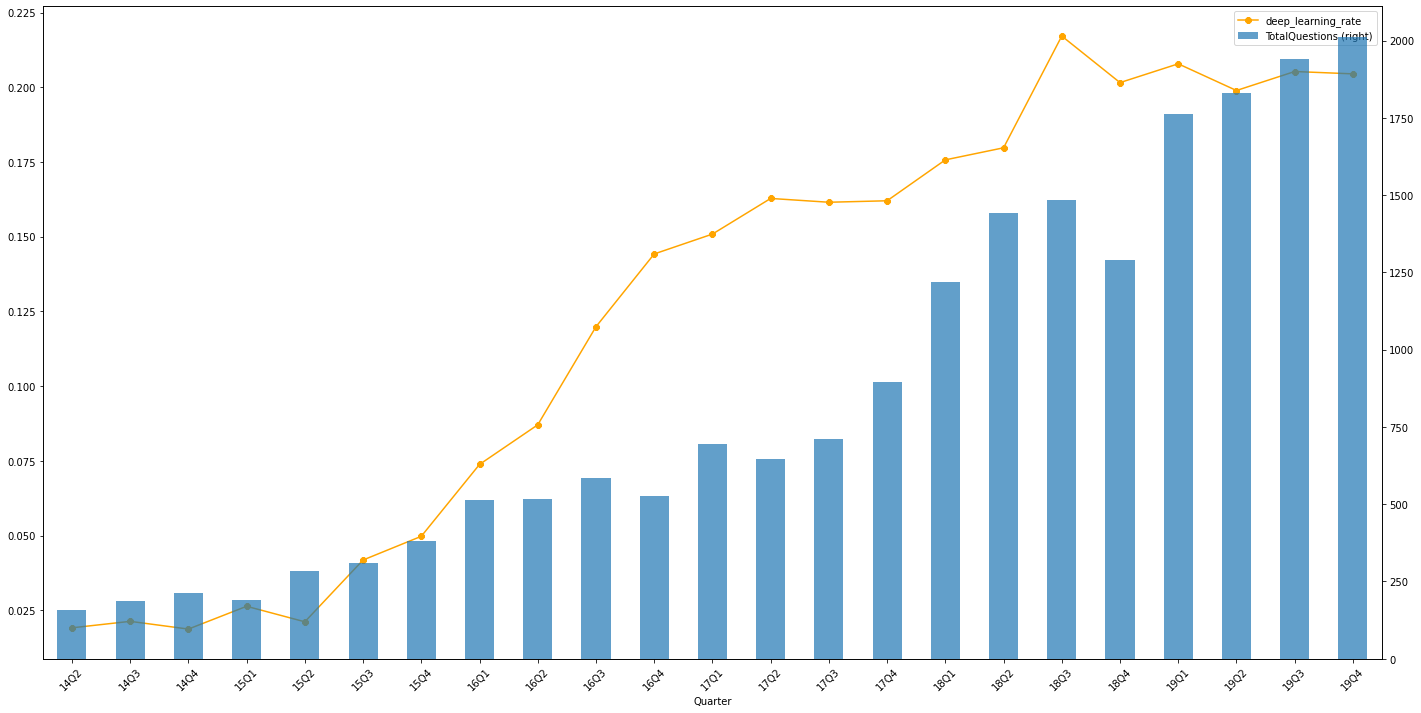

In [46]:
ax1 = quarterly.plot(x="Quarter", y="deep_learning_rate",
                    kind="line", linestyle="-", marker="8", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45) #soften colour by adjusting 'alpha'

From the data visualisation above, it is clear that deep learning quetsions has been increasing since the 2014 and has plateaued/plateauing. No evidence to suggest decreasing in these questions. Therefore, **my recommendation will be to create deep learning content**. 